In [349]:
import pandas as pd
import time
from datetime import datetime, timedelta
from pytz import timezone
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import pickle

In [350]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, auc, roc_auc_score

In [351]:
from sklearn import preprocessing

In [352]:
pd.set_option('display.max_columns', None)

In [353]:
ticker = "TRX"

In [354]:
tiker_df = pd.read_csv("../data/train/onchain/TRX_train.csv")

In [355]:
tiker_df.shape

(469253, 4)

In [356]:
tiker_df.head()

,from,to,value,timestamp
0,aca5b,52aa9,1.000000e+08,1520370474
1,113582,8d0d5,4.995468e+09,1520370493
2,8ef0d,104fc4,1.000000e+09,1520370524
3,60dbe,69d9e,3.670003e+11,1520370548
4,11416e,69d9e,3.997940e+11,1520370637


In [357]:
#initialize dataframe with features. rows are per time slot
features_onchain = pd.DataFrame()

In [358]:
onchainDF_all = pd.read_pickle("../data/train/onchain/onchain_train_withDates.pickle")

In [359]:
onchainDF_all.tail()

,Unnamed: 0,datetime,name,priceBtc,priceUsd,ticker,volume,date_date,date_datetime,date_string
322416,727,2018-04-30T14:00:00Z,Zilliqa,0.000011,0.106509,ZIL,44501200.0,2018-04-30,2018-04-30 14:00:00,2018-04-30 14:00:00
322417,728,2018-04-30T16:00:00Z,Zilliqa,0.000011,0.106336,ZIL,45281300.0,2018-04-30,2018-04-30 16:00:00,2018-04-30 16:00:00
322418,729,2018-04-30T18:00:00Z,Zilliqa,0.000011,0.106184,ZIL,45105100.0,2018-04-30,2018-04-30 18:00:00,2018-04-30 18:00:00
322419,730,2018-04-30T20:00:00Z,Zilliqa,0.000011,0.103161,ZIL,45033100.0,2018-04-30,2018-04-30 20:00:00,2018-04-30 20:00:00
322420,731,2018-04-30T22:00:00Z,Zilliqa,0.000011,0.101195,ZIL,42630300.0,2018-04-30,2018-04-30 22:00:00,2018-04-30 22:00:00


In [360]:
onchainDF_all.shape

(322421, 10)

In [361]:
len(onchainDF_all['ticker'].unique())

509

In [362]:
#onchain_ticker = pd.read_pickle("../data/train/onchain/onchain_train_eos_withDates.pickle")
onchain_ticker = pd.read_pickle("../data/train/onchain/onchain_train_withDates.pickle")

In [363]:
#onchain_ticker = onchain_ticker[onchain_ticker['ticker'] == ]

In [364]:
onchain_ticker.head()

,Unnamed: 0,datetime,name,priceBtc,priceUsd,ticker,volume,date_date,date_datetime,date_string
0,0,2018-03-01T00:00:00Z,0x,0.000087,0.902278,ZRX,8127100.0,2018-03-01,2018-03-01 00:00:00,2018-03-01 00:00:00
1,1,2018-03-01T02:00:00Z,0x,0.000086,0.895107,ZRX,7962720.0,2018-03-01,2018-03-01 02:00:00,2018-03-01 02:00:00
2,2,2018-03-01T04:00:00Z,0x,0.000088,0.917095,ZRX,7980440.0,2018-03-01,2018-03-01 04:00:00,2018-03-01 04:00:00
3,3,2018-03-01T06:00:00Z,0x,0.000087,0.910295,ZRX,7554380.0,2018-03-01,2018-03-01 06:00:00,2018-03-01 06:00:00
4,4,2018-03-01T08:00:00Z,0x,0.000087,0.927460,ZRX,7468790.0,2018-03-01,2018-03-01 08:00:00,2018-03-01 08:00:00


In [365]:
partialDF = onchainDF_all[onchainDF_all['ticker'] == ticker]
partialDF.head()

,Unnamed: 0,datetime,name,priceBtc,priceUsd,ticker,volume,date_date,date_datetime,date_string
297651,0,2018-03-01T00:00:00Z,TRON,0.000004,0.042831,TRX,304547000.0,2018-03-01,2018-03-01 00:00:00,2018-03-01 00:00:00
297652,1,2018-03-01T02:00:00Z,TRON,0.000004,0.043037,TRX,306758000.0,2018-03-01,2018-03-01 02:00:00,2018-03-01 02:00:00
297653,2,2018-03-01T04:00:00Z,TRON,0.000004,0.043140,TRX,310876000.0,2018-03-01,2018-03-01 04:00:00,2018-03-01 04:00:00
297654,3,2018-03-01T06:00:00Z,TRON,0.000004,0.043597,TRX,317942000.0,2018-03-01,2018-03-01 06:00:00,2018-03-01 06:00:00
297655,4,2018-03-01T08:00:00Z,TRON,0.000004,0.044048,TRX,321744000.0,2018-03-01,2018-03-01 08:00:00,2018-03-01 08:00:00


In [366]:
partialDF.tail()

,Unnamed: 0,datetime,name,priceBtc,priceUsd,ticker,volume,date_date,date_datetime,date_string
298378,727,2018-04-30T14:00:00Z,TRON,0.000010,0.095271,TRX,1.401950e+09,2018-04-30,2018-04-30 14:00:00,2018-04-30 14:00:00
298379,728,2018-04-30T16:00:00Z,TRON,0.000011,0.098503,TRX,1.565180e+09,2018-04-30,2018-04-30 16:00:00,2018-04-30 16:00:00
298380,729,2018-04-30T18:00:00Z,TRON,0.000011,0.099046,TRX,1.604280e+09,2018-04-30,2018-04-30 18:00:00,2018-04-30 18:00:00
298381,730,2018-04-30T20:00:00Z,TRON,0.000011,0.097680,TRX,1.635490e+09,2018-04-30,2018-04-30 20:00:00,2018-04-30 20:00:00
298382,731,2018-04-30T22:00:00Z,TRON,0.000010,0.093160,TRX,1.749640e+09,2018-04-30,2018-04-30 22:00:00,2018-04-30 22:00:00


Text(0.5,1,'USD volume TRX')

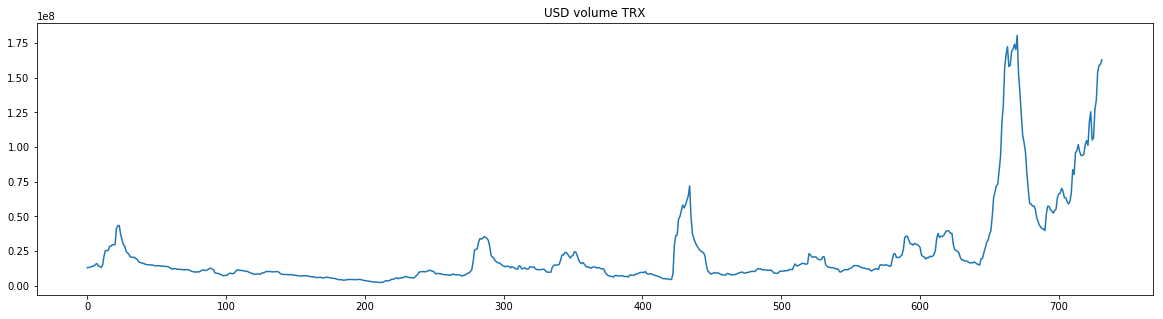

In [367]:
rows = 1
cols = 1
fig, axes = plt.subplots(nrows = rows, ncols = cols, figsize=(20,5))
ticks = range(0, partialDF.shape[0])
tick_labels = partialDF['date_string']
meanSum = 1.0*partialDF['priceUsd']*partialDF['volume'].sum()/partialDF.shape[0]
stdSum = 1.0*partialDF['priceUsd']*partialDF['volume'].std()
#prices = (partialDF['priceUsd']*partialDF['volume'] - meanSum)/stdSum
prices = (partialDF['priceUsd']*partialDF['volume'])
axes.plot(ticks, prices)
#axes.set_xticks(ticks);
#axes.set_xticklabels(tick_labels, rotation = 90);
axes.set_title("USD volume "+ ticker)

Text(0.5,1,'TRX price Btc')

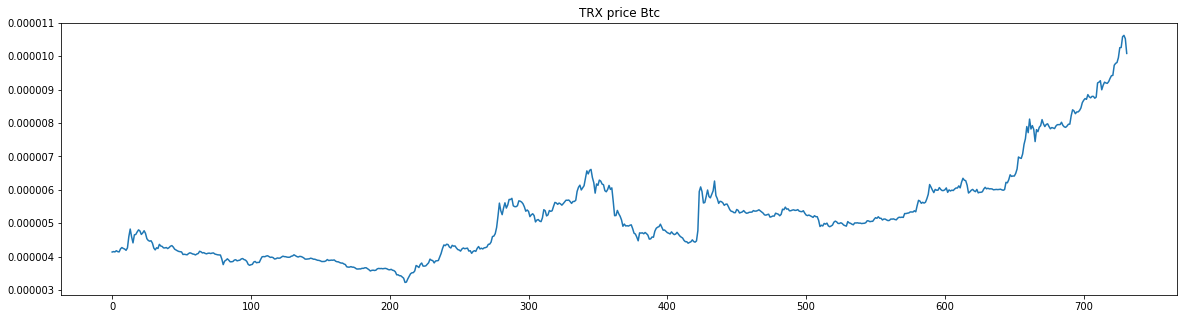

In [368]:
rows = 1
cols = 1
fig, axes = plt.subplots(nrows = rows, ncols = cols, figsize=(20,5))
ticks = range(0, partialDF.shape[0])
tick_labels = partialDF['date_string']
#meanSum = 1.0*partialDF['priceUsd']*partialDF['volume'].sum()/partialDF.shape[0]
#stdSum = 1.0*partialDF['priceUsd']*partialDF['volume'].std()
#prices = (partialDF['priceUsd']*partialDF['volume'] - meanSum)/stdSum
prices = (partialDF['priceBtc'])
axes.plot(ticks, prices)
#axes.set_xticks(ticks);
#axes.set_xticklabels(tick_labels, rotation = 90);
axes.set_title(ticker + " price Btc")

In [369]:
pkl_file = open('/home/anna/Documents/AISThack/pickles/Y_trx.pickle', 'rb')
#pkl_file = open('/home/anna/Documents/AISThack/pickles/Y_drgn.pickle', 'rb')
Y = pickle.load(pkl_file)
pkl_file.close()

In [370]:
len(Y)

732

In [371]:
set(Y)

{0, 1, 2}

In [372]:
partialDF.shape

(732, 10)

In [373]:
# volume normalized
meanSum = 1.0*partialDF['priceUsd']*partialDF['volume'].sum()/partialDF.shape[0]
stdSum = 1.0*partialDF['priceUsd']*partialDF['volume'].std()
volume_normalised = (partialDF['priceUsd']*partialDF['volume'] - meanSum)/stdSum

VOLUME PER TIMESLOT


In [374]:
features_onchain['volume_normalised'] = volume_normalised

In [375]:
# BTC\USD price


In [376]:
btc_to_usd = partialDF['priceUsd']/partialDF['priceBtc']

In [377]:
btc_to_usd_mean = btc_to_usd.mean()
btc_to_usd_std = btc_to_usd.std()

In [378]:
btc_to_usd = (btc_to_usd - btc_to_usd_mean)/btc_to_usd_std

BTC TO USD price change vs prev slot

In [379]:
features_onchain['btc_to_usd'] = btc_to_usd

In [380]:
btc_day_to_yest =  list(partialDF['priceBtc'].values)

In [381]:
btc_day_to_yest[1], partialDF['priceBtc'].values[1], 100-(btc_day_to_yest[1]/btc_day_to_yest[0])*100

(4.152857083333333e-06, 4.152857083333333e-06, -0.30449043893379724)

In [382]:
btc_day_to_prev_perc = [1]*len(btc_day_to_yest)
for i in range(1, len(btc_day_to_yest)):
    btc_day_to_prev_perc[i] = round(100-(btc_day_to_yest[i]/btc_day_to_yest[i-1])*100,6)

BTC price change percent to prev slot

In [383]:
features_onchain['btc_slot_to_prev_perc'] = btc_day_to_prev_perc

In [384]:
features_onchain.head()

,volume_normalised,btc_to_usd,btc_slot_to_prev_perc
297651,-0.351911,1.474317,1.000000
297652,-0.346060,1.489017,-0.304490
297653,-0.335162,1.527841,0.226330
297654,-0.316463,1.543587,-0.869453
297655,-0.306401,1.687928,0.674555


In [385]:
features_onchain.shape

(732, 3)

In [410]:
onchain_ticker = pd.read_pickle("../data/train/onchain/onchain_train_trx_withDates.pickle")

In [411]:
onchain_ticker.tail()

,from,to,value,timestamp,date_date,date_datetime,date_string
469248,11eeb1,11aad9,7.873947e+10,1525054091,2018-04-30,2018-04-30 05:08:11,2018-04-30 05:08:11
469249,4481f,14ac53,1.000000e+07,1525054091,2018-04-30,2018-04-30 05:08:11,2018-04-30 05:08:11
469250,bc9b7,96d1f,3.597031e+09,1525054108,2018-04-30,2018-04-30 05:08:28,2018-04-30 05:08:28
469251,23cdc,95d21,9.293694e+08,1525054108,2018-04-30,2018-04-30 05:08:28,2018-04-30 05:08:28
469252,f4b10,2077e,3.208266e+09,1525054108,2018-04-30,2018-04-30 05:08:28,2018-04-30 05:08:28


In [412]:
# add timeslots
min_date = datetime.strptime("2018-03-01 00:00:00","%Y-%m-%d %H:%M:%S")
news_train = onchain_ticker.sort_values(by = 'date_datetime', ascending = True).copy()

In [413]:
def build_timeSlots(df, colname):
    min_date = datetime.strptime("2018-03-01 00:00:00","%Y-%m-%d %H:%M:%S")
    cur_date = min_date
    #max_date = datetime.now()
    max_date = datetime.strptime("2018-05-01 00:00:00","%Y-%m-%d %H:%M:%S")
    delta = timedelta(hours=2)
    print min_date, max_date 
    tmpDict = {}
    ll = []
    while cur_date < max_date:
        indices = df[(df[colname]>=cur_date) & (df[colname]< cur_date + delta)].index
        tmpDF = pd.DataFrame({'cur_date': cur_date, 'max_date': cur_date + delta}, index = indices)
        #print cur_date, max_date
        #print len(indices), tmpDF.shape[0]
        #tmpDF = df[(df[colname]>=min_date) & (df[colname]< cur_date + delta)].copy()
        if tmpDF.shape[0] == 0:
            pass;
        cur_date = cur_date + delta
        ll.append(tmpDF)
    return ll

In [414]:
%%time
result = build_timeSlots(news_train, 'date_datetime')

2018-03-01 00:00:00 2018-05-01 00:00:00
CPU times: user 5.09 s, sys: 1.44 ms, total: 5.09 s
Wall time: 5.09 s


In [415]:
len(result)

732

In [416]:
%%time
news_train_with_timeslots =  pd.concat(result)

CPU times: user 129 ms, sys: 24.5 ms, total: 154 ms
Wall time: 142 ms


In [417]:
news_train = news_train[news_train['date_datetime']>min_date]

In [418]:
news_train = news_train.merge(news_train_with_timeslots, left_index = True, right_index = True)

In [419]:
news_train.tail()

,from,to,value,timestamp,date_date,date_datetime,date_string,cur_date,max_date
458652,946b3,f4b10,7.206878e+10,1525121960,2018-04-30,2018-04-30 23:59:20,2018-04-30 23:59:20,2018-04-30 22:00:00,2018-05-01
458653,6173,d5895,9.470000e+08,1525121986,2018-04-30,2018-04-30 23:59:46,2018-04-30 23:59:46,2018-04-30 22:00:00,2018-05-01
458654,6173,500a9,6.713406e+09,1525121986,2018-04-30,2018-04-30 23:59:46,2018-04-30 23:59:46,2018-04-30 22:00:00,2018-05-01
458655,113582,45360,2.504500e+10,1525121986,2018-04-30,2018-04-30 23:59:46,2018-04-30 23:59:46,2018-04-30 22:00:00,2018-05-01
458656,488d5,23b56,2.000000e+09,1525121986,2018-04-30,2018-04-30 23:59:46,2018-04-30 23:59:46,2018-04-30 22:00:00,2018-05-01


In [420]:
news_train.to_pickle("../pickles/onchain_with_dates_slots.pickle")

In [421]:
volumes = news_train_bySlot = news_train.groupby("cur_date")['value'].sum().values
vsum = volumes.mean()
vstd = volumes.std()   
volumes  = (volumes - vsum)/vstd

In [422]:
#volumes

market volumes per slot

In [423]:
len(volumes)

731

In [424]:
last_vol = (volumes[-1]+volumes[-2])/2

In [425]:
volumes = list(volumes)

In [426]:
#volumes

In [427]:
volumes.append(last_vol)

In [428]:
features_onchain['market_volume_per_slot'] = volumes

In [429]:
#features_onchain.head(50)

In [430]:
features_onchain.head()

,volume_normalised,btc_to_usd,btc_slot_to_prev_perc,market_volume_per_slot
297651,-0.351911,1.474317,1.000000,-0.459336
297652,-0.346060,1.489017,-0.304490,-0.193284
297653,-0.335162,1.527841,0.226330,2.820123
297654,-0.316463,1.543587,-0.869453,-0.433022
297655,-0.306401,1.687928,0.674555,-0.443825


In [431]:
# check simle model on simple vars
#x_train, x_test, y_train, y_test = train_test_split(features_onchain, Y, test_size=0.25, random_state=0)
x_train = features_onchain.iloc[:658]
x_test = features_onchain.iloc[659:]
y_train = Y[:658]
y_test = Y[659:]
lr_char = LogisticRegression(solver='sag', verbose=2, multi_class='multinomial')
lr_char.fit(x_train, y_train)
y_pred_char = lr_char.predict(x_test)
print("test accuracy: {}".format(accuracy_score(y_test, y_pred_char)))
y_pred_train = lr_char.predict(x_train)
print("train accuracy {}" .format(accuracy_score(y_train, y_pred_train)))

convergence after 31 epochs took 0 seconds
test accuracy: 0.520547945205
train accuracy 0.457446808511


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [432]:
zip(y_pred_char, y_train)

[(1, 0),
 (1, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 2),
 (1, 2),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 0),
 (1, 2),
 (1, 2),
 (1, 1),
 (1, 2),
 (1, 2),
 (1, 2),
 (1, 2),
 (1, 2),
 (1, 2),
 (1, 2),
 (1, 2),
 (1, 1),
 (0, 1),
 (1, 1),
 (1, 1),
 (1, 2),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 1),
 (1, 0),
 (1, 2),
 (1, 2),
 (1, 2),
 (1, 0),
 (1, 2),
 (1, 2),
 (1, 2),
 (1, 2),
 (1, 2),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0)]

In [433]:
features_onchain.to_pickle("../pickles/plain_features_onchain.pickle")

In [434]:
coefficients = pd.concat([pd.DataFrame(features_onchain.columns),pd.DataFrame(np.transpose(lr_char.coef_))], axis = 1)
coefficients.columns = ["variable", "do nothing", "buy", "sell"]
coefficients["abs_buy"] = coefficients["buy"].abs()
coefficients["abs_sell"] = coefficients["sell"].abs()
coefficients.to_pickle("../pickles/DRGN_simpleLogreg_importance.pickle")
coefficients.sort_values(by = "abs_buy", ascending = False).head(10)

,variable,do nothing,buy,sell,abs_buy,abs_sell
0,volume_normalised,-0.464197,0.286540,0.177657,0.286540,0.177657
2,btc_slot_to_prev_perc,0.021934,-0.083190,0.061256,0.083190,0.061256
1,btc_to_usd,0.087657,-0.010336,-0.077321,0.010336,0.077321
3,market_volume_per_slot,-0.140228,0.003697,0.136530,0.003697,0.136530


In [435]:
coefficients.sort_values(by = "abs_sell", ascending = False).head(10)

,variable,do nothing,buy,sell,abs_buy,abs_sell
0,volume_normalised,-0.464197,0.286540,0.177657,0.286540,0.177657
3,market_volume_per_slot,-0.140228,0.003697,0.136530,0.003697,0.136530
1,btc_to_usd,0.087657,-0.010336,-0.077321,0.010336,0.077321
2,btc_slot_to_prev_perc,0.021934,-0.083190,0.061256,0.083190,0.061256


12,24,48 hours averages

In [436]:
features_onchain = pd.read_pickle("../pickles/plain_features_onchain.pickle")

In [437]:
features_onchain.head()

,volume_normalised,btc_to_usd,btc_slot_to_prev_perc,market_volume_per_slot
297651,-0.351911,1.474317,1.000000,-0.459336
297652,-0.346060,1.489017,-0.304490,-0.193284
297653,-0.335162,1.527841,0.226330,2.820123
297654,-0.316463,1.543587,-0.869453,-0.433022
297655,-0.306401,1.687928,0.674555,-0.443825


In [438]:
cols = features_onchain.columns

In [439]:
%%time
averages = [6,12,18, 24,48]
features_to_av = cols
for feature in features_to_av:
    for av in averages:
        feature_name = feature + "_" + str(av)
        #print feature_name
        features_onchain[feature_name] = features_onchain[feature].rolling(window=av, min_periods = 1).mean()
        tmp = features_onchain[feature].rolling(window=av, min_periods = 1).mean()
        #print features_onchain[feature].iloc[0]
        #print tmp.iloc[0]

CPU times: user 42.2 ms, sys: 0 ns, total: 42.2 ms
Wall time: 41 ms


In [440]:
features_onchain.tail()

,volume_normalised,btc_to_usd,btc_slot_to_prev_perc,market_volume_per_slot,volume_normalised_6,volume_normalised_12,volume_normalised_18,volume_normalised_24,volume_normalised_48,btc_to_usd_6,btc_to_usd_12,btc_to_usd_18,btc_to_usd_24,btc_to_usd_48,btc_slot_to_prev_perc_6,btc_slot_to_prev_perc_12,btc_slot_to_prev_perc_18,btc_slot_to_prev_perc_24,btc_slot_to_prev_perc_48,market_volume_per_slot_6,market_volume_per_slot_12,market_volume_per_slot_18,market_volume_per_slot_24,market_volume_per_slot_48
298378,2.552225,0.621340,-0.053955,0.169822,2.260626,2.047829,1.933095,1.662203,1.202536,0.608694,0.641627,0.652577,0.664538,0.599248,-1.433497,-0.898208,-0.884279,-0.628737,-0.571523,-0.079326,-0.209800,-0.201399,-0.165078,-0.155252
298379,2.984192,0.640253,-3.131534,-0.152925,2.374667,2.150775,2.021815,1.749104,1.242385,0.608345,0.642467,0.645542,0.663825,0.606888,-1.417666,-1.180507,-0.790203,-0.790902,-0.616140,-0.085982,-0.195954,-0.208340,-0.222838,-0.152947
298380,3.087665,0.651791,-0.396294,-0.010081,2.473081,2.261953,2.122507,1.840652,1.285850,0.613374,0.643245,0.639755,0.662045,0.614656,-1.387584,-1.224490,-0.798523,-0.820777,-0.613909,-0.071656,-0.172264,-0.196670,-0.208492,-0.156805
298381,3.170258,0.618366,0.937156,-0.147021,2.680918,2.380072,2.200174,1.939736,1.332075,0.623861,0.640935,0.636423,0.659489,0.617945,-1.186346,-1.098943,-0.720035,-0.760816,-0.594068,-0.092850,-0.151916,-0.197101,-0.199959,-0.152436
298382,3.472342,0.584593,4.193782,-0.078551,2.940650,2.509784,2.285469,2.053457,1.386673,0.623960,0.631121,0.635829,0.656042,0.618429,-0.240944,-0.661259,-0.649862,-0.586490,-0.506334,-0.055680,-0.122285,-0.190890,-0.187527,-0.145978


In [442]:
#x_train, x_test, y_train, y_test = train_test_split(features_onchain, Y, test_size=0.25, random_state=0)
# check simle model on added vars
# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=40, stratify=Y)
x_train = features_onchain.iloc[:658]
x_test = features_onchain.iloc[659:]
y_train = Y[:658]
y_test = Y[659:]
print(len(x_train), len(x_test), len(y_train), len(y_test))
lr_char = LogisticRegression(solver='sag', verbose=2, multi_class='multinomial')
lr_char.fit(x_train, y_train)
y_pred_char = lr_char.predict(x_test)
print("test accuracy: {}".format(accuracy_score(y_test, y_pred_char)))
y_pred_train = lr_char.predict(x_train)
print("train accuracy {}" .format(accuracy_score(y_train, y_pred_train)))

(658, 73, 658, 73)
max_iter reached after 0 seconds
test accuracy: 0.452054794521
train accuracy 0.528875379939


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


In [443]:
#zip(y_pred_char, y_test)

check hypothesis, that exchage activity (in tikers or for whole market) influences ticker behavior

In [444]:
exchange_wallets = pd.read_csv("../data/train/exchange_eth_addresses_upd.csv")

In [445]:
exchange_wallets.head()

,Id,Address,Name,Source,Comments,Address_code
0,48,0x8958618332dF62AF93053cb9c535e26462c959B0,CobinhoodWallet,https://etherscan.io/accounts/91?ps=100,NaN,1123e2
1,47,0x59a5208B32e627891C389EbafC644145224006E8,HitBTC_2,https://etherscan.io/accounts/72?ps=100,NaN,69d9e
2,46,0x0681d8Db095565FE8A346fA0277bFfdE9C0eDBBF,BinanceWallet_3,https://etherscan.io/accounts/7?ps=100,NaN,92a54
3,44,0xE723F2E91ad9f84595408a9f1688361e956722e2,Huobi cold wallet,ICOdrops Telegram,Not confirmed. Probability - high,--
4,42,0xf73c3c65bde10bf26c2e1763104e609a41702efe,Bibox,https://etherscan.io/accounts/15?ps=100,NaN,7c4b1


In [446]:
e_wallets = list(exchange_wallets["Address_code"].unique())

In [447]:
e_wallets

['1123e2',
 '69d9e',
 '92a54',
 '--',
 '7c4b1',
 '13c4a1',
 '82b00',
 '6b733',
 'd3e36',
 '965e4',
 'ad23a',
 '6173',
 '1fc0c',
 'c5aa4',
 '134e6d',
 '95c80',
 '12db35',
 '135ba8',
 'e40a7',
 '68fbf',
 '881b5',
 '104fc4',
 '11aad9',
 '321d0',
 '792aa',
 '113582']

In [448]:
exchange_wallets = exchange_wallets[~exchange_wallets['Address_code'].str.contains('--')]

In [449]:
news_train.head()

,from,to,value,timestamp,date_date,date_datetime,date_string,cur_date,max_date
14892,ad23a,f5fda,4.498760e+11,1519862510,2018-03-01,2018-03-01 03:01:50,2018-03-01 03:01:50,2018-03-01 02:00:00,2018-03-01 04:00:00
14893,ad23a,4e1bf,2.382000e+09,1519862575,2018-03-01,2018-03-01 03:02:55,2018-03-01 03:02:55,2018-03-01 02:00:00,2018-03-01 04:00:00
14894,d33b9,29872,8.000000e+09,1519862699,2018-03-01,2018-03-01 03:04:59,2018-03-01 03:04:59,2018-03-01 02:00:00,2018-03-01 04:00:00
14895,1123e2,363db,1.036461e+11,1519862716,2018-03-01,2018-03-01 03:05:16,2018-03-01 03:05:16,2018-03-01 02:00:00,2018-03-01 04:00:00
14992,bcb52,8c46e,6.000000e+08,1519862753,2018-03-01,2018-03-01 03:05:53,2018-03-01 03:05:53,2018-03-01 02:00:00,2018-03-01 04:00:00


In [450]:
# filter all chain by those addresses
onchain_wallet_data_from = news_train[(news_train['from'].isin(e_wallets))]

In [451]:
onchain_wallet_data_from.head()

,from,to,value,timestamp,date_date,date_datetime,date_string,cur_date,max_date
14892,ad23a,f5fda,4.498760e+11,1519862510,2018-03-01,2018-03-01 03:01:50,2018-03-01 03:01:50,2018-03-01 02:00:00,2018-03-01 04:00:00
14893,ad23a,4e1bf,2.382000e+09,1519862575,2018-03-01,2018-03-01 03:02:55,2018-03-01 03:02:55,2018-03-01 02:00:00,2018-03-01 04:00:00
14895,1123e2,363db,1.036461e+11,1519862716,2018-03-01,2018-03-01 03:05:16,2018-03-01 03:05:16,2018-03-01 02:00:00,2018-03-01 04:00:00
15055,92a54,1044f3,1.120116e+10,1519863248,2018-03-01,2018-03-01 03:14:08,2018-03-01 03:14:08,2018-03-01 02:00:00,2018-03-01 04:00:00
15056,6173,5e81c,3.051870e+11,1519863268,2018-03-01,2018-03-01 03:14:28,2018-03-01 03:14:28,2018-03-01 02:00:00,2018-03-01 04:00:00


In [452]:
onchain_wallet_data_from['from'].unique()

array(['ad23a', '1123e2', '92a54', '6173', '113582', '68fbf', '11aad9',
       '69d9e', '135ba8', '82b00', 'e40a7', '7c4b1', '104fc4', '321d0',
       '881b5'], dtype=object)

In [453]:
onchain_wallet_data_from_byAdrDate = onchain_wallet_data_from.groupby(["cur_date", "from"])

In [454]:
onchain_wallet_data_from_byAdrDate = onchain_wallet_data_from.groupby(["cur_date", "from"])['value'].sum().to_frame()

In [455]:
onchain_wallet_data_from_byAdrDate.reset_index(inplace = True);

In [456]:
onchain_wallet_data_from_byAdrDate.head()

,cur_date,from,value
0,2018-03-01 02:00:00,1123e2,1.036461e+11
1,2018-03-01 02:00:00,113582,4.691457e+11
2,2018-03-01 02:00:00,6173,1.214579e+12
3,2018-03-01 02:00:00,68fbf,1.283000e+10
4,2018-03-01 02:00:00,92a54,2.337151e+10


In [457]:
#pd.melt(onchain_wallet_data_from_byAdrDate, id_vars=['cur_date', 'from'], value_vars=['value'])

In [458]:
echange_from_pivot = onchain_wallet_data_from_byAdrDate.pivot(index='cur_date', columns='from', values='value')

In [459]:
echange_from_pivot.fillna(0, inplace = True);

In [460]:
echange_from_pivot.head()

from,104fc4,1123e2,113582,11aad9,135ba8,321d0,6173,68fbf,69d9e,7c4b1,82b00,881b5,92a54,ad23a,e40a7
cur_date,,,,,,,,,,,,,,,
2018-03-01 02:00:00,0.0,1.036461e+11,4.691457e+11,0.000000e+00,0.000000e+00,0.0,1.214579e+12,1.283000e+10,0.000000e+00,0.000000e+00,0.000000e+00,0.0,2.337151e+10,1.332423e+12,0.000000e+00
2018-03-01 04:00:00,0.0,0.000000e+00,6.307244e+11,1.543134e+12,6.179800e+10,0.0,6.657318e+11,0.000000e+00,2.023000e+10,0.000000e+00,3.486200e+10,0.0,2.388753e+12,6.047821e+11,0.000000e+00
2018-03-01 06:00:00,0.0,0.000000e+00,1.208745e+14,2.364713e+10,1.433126e+10,0.0,8.976435e+11,0.000000e+00,8.946000e+10,0.000000e+00,0.000000e+00,0.0,1.565954e+12,8.342859e+11,2.464102e+09
2018-03-01 08:00:00,0.0,0.000000e+00,5.595718e+11,8.945586e+11,4.238753e+09,0.0,3.157838e+11,0.000000e+00,7.964000e+09,7.004866e+09,4.268063e+11,0.0,5.386084e+11,6.597963e+11,0.000000e+00
2018-03-01 10:00:00,0.0,0.000000e+00,1.291116e+12,1.453061e+12,1.664420e+12,0.0,4.321021e+11,4.171909e+08,1.464200e+11,0.000000e+00,6.963405e+10,0.0,1.614675e+11,5.875033e+11,0.000000e+00


In [461]:
x = echange_from_pivot.loc[:, echange_from_pivot.columns != 'cur_date_from'].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
echange_from_pivot_scaled = pd.DataFrame(x_scaled)

In [462]:
echange_from_pivot_scaled.index = echange_from_pivot.index

In [463]:
echange_from_pivot_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
cur_date,,,,,,,,,,,,,,,
2018-03-01 02:00:00,0.0,0.016234,0.000699,0.000000,0.000000,0.0,0.006343,0.007877,0.000000,0.000000,0.000000,0.0,0.000115,0.008412,0.000000
2018-03-01 04:00:00,0.0,0.000000,0.000939,0.058402,0.005437,0.0,0.003477,0.000000,0.000505,0.000000,0.005757,0.0,0.011731,0.003818,0.000000
2018-03-01 06:00:00,0.0,0.000000,0.180046,0.000895,0.001261,0.0,0.004688,0.000000,0.002233,0.000000,0.000000,0.0,0.007690,0.005267,0.004615
2018-03-01 08:00:00,0.0,0.000000,0.000833,0.033855,0.000373,0.0,0.001649,0.000000,0.000199,0.014004,0.070477,0.0,0.002645,0.004166,0.000000
2018-03-01 10:00:00,0.0,0.000000,0.001923,0.054993,0.146433,0.0,0.002257,0.000256,0.003654,0.000000,0.011498,0.0,0.000793,0.003709,0.000000


In [464]:
echange_from_pivot_scaled.columns = echange_from_pivot.columns

In [465]:
echange_from_pivot_scaled.head()

from,104fc4,1123e2,113582,11aad9,135ba8,321d0,6173,68fbf,69d9e,7c4b1,82b00,881b5,92a54,ad23a,e40a7
cur_date,,,,,,,,,,,,,,,
2018-03-01 02:00:00,0.0,0.016234,0.000699,0.000000,0.000000,0.0,0.006343,0.007877,0.000000,0.000000,0.000000,0.0,0.000115,0.008412,0.000000
2018-03-01 04:00:00,0.0,0.000000,0.000939,0.058402,0.005437,0.0,0.003477,0.000000,0.000505,0.000000,0.005757,0.0,0.011731,0.003818,0.000000
2018-03-01 06:00:00,0.0,0.000000,0.180046,0.000895,0.001261,0.0,0.004688,0.000000,0.002233,0.000000,0.000000,0.0,0.007690,0.005267,0.004615
2018-03-01 08:00:00,0.0,0.000000,0.000833,0.033855,0.000373,0.0,0.001649,0.000000,0.000199,0.014004,0.070477,0.0,0.002645,0.004166,0.000000
2018-03-01 10:00:00,0.0,0.000000,0.001923,0.054993,0.146433,0.0,0.002257,0.000256,0.003654,0.000000,0.011498,0.0,0.000793,0.003709,0.000000


In [466]:
echange_from_pivot_scaled.reset_index(inplace = True);

In [467]:
echange_from_pivot_scaled.to_pickle("../pickles/echange_from_pivot_scaled_from.pickle")

In [468]:
echange_from_pivot_scaled.drop('cur_date', axis = 1, inplace = True)

In [469]:
features_onchain.head()

,volume_normalised,btc_to_usd,btc_slot_to_prev_perc,market_volume_per_slot,volume_normalised_6,volume_normalised_12,volume_normalised_18,volume_normalised_24,volume_normalised_48,btc_to_usd_6,btc_to_usd_12,btc_to_usd_18,btc_to_usd_24,btc_to_usd_48,btc_slot_to_prev_perc_6,btc_slot_to_prev_perc_12,btc_slot_to_prev_perc_18,btc_slot_to_prev_perc_24,btc_slot_to_prev_perc_48,market_volume_per_slot_6,market_volume_per_slot_12,market_volume_per_slot_18,market_volume_per_slot_24,market_volume_per_slot_48
297651,-0.351911,1.474317,1.000000,-0.459336,-0.351911,-0.351911,-0.351911,-0.351911,-0.351911,1.474317,1.474317,1.474317,1.474317,1.474317,1.000000,1.000000,1.000000,1.000000,1.000000,-0.459336,-0.459336,-0.459336,-0.459336,-0.459336
297652,-0.346060,1.489017,-0.304490,-0.193284,-0.348985,-0.348985,-0.348985,-0.348985,-0.348985,1.481667,1.481667,1.481667,1.481667,1.481667,0.347755,0.347755,0.347755,0.347755,0.347755,-0.326310,-0.326310,-0.326310,-0.326310,-0.326310
297653,-0.335162,1.527841,0.226330,2.820123,-0.344378,-0.344378,-0.344378,-0.344378,-0.344378,1.497059,1.497059,1.497059,1.497059,1.497059,0.307280,0.307280,0.307280,0.307280,0.307280,0.722501,0.722501,0.722501,0.722501,0.722501
297654,-0.316463,1.543587,-0.869453,-0.433022,-0.337399,-0.337399,-0.337399,-0.337399,-0.337399,1.508691,1.508691,1.508691,1.508691,1.508691,0.013097,0.013097,0.013097,0.013097,0.013097,0.433620,0.433620,0.433620,0.433620,0.433620
297655,-0.306401,1.687928,0.674555,-0.443825,-0.331199,-0.331199,-0.331199,-0.331199,-0.331199,1.544538,1.544538,1.544538,1.544538,1.544538,0.145388,0.145388,0.145388,0.145388,0.145388,0.258131,0.258131,0.258131,0.258131,0.258131


In [470]:
features_onchain.reset_index(inplace = True)

In [471]:
features_onchain.drop('index', axis = 1,inplace = True)

In [472]:
#merge exchange from to onchain data
features_onchain_merged = features_onchain.merge(echange_from_pivot_scaled, left_index = True, right_index = True, how = 'left')

In [473]:
features_onchain_merged.shape, features_onchain.shape

((732, 39), (732, 24))

In [474]:
features_onchain_merged.isnull().sum()

volume_normalised            0
btc_to_usd                   0
btc_slot_to_prev_perc        0
market_volume_per_slot       0
volume_normalised_6          0
volume_normalised_12         0
volume_normalised_18         0
volume_normalised_24         0
volume_normalised_48         0
btc_to_usd_6                 0
btc_to_usd_12                0
btc_to_usd_18                0
btc_to_usd_24                0
btc_to_usd_48                0
btc_slot_to_prev_perc_6      0
btc_slot_to_prev_perc_12     0
btc_slot_to_prev_perc_18     0
btc_slot_to_prev_perc_24     0
btc_slot_to_prev_perc_48     0
market_volume_per_slot_6     0
market_volume_per_slot_12    0
market_volume_per_slot_18    0
market_volume_per_slot_24    0
market_volume_per_slot_48    0
104fc4                       1
1123e2                       1
113582                       1
11aad9                       1
135ba8                       1
321d0                        1
6173                         1
68fbf                        1
69d9e   

In [475]:
features_onchain_merged.fillna(0, inplace = True);

In [476]:
len(Y)

732

In [477]:
#x_train, x_test, y_train, y_test = train_test_split(features_onchain_merged, Y, test_size=0.25, random_state=0)
# check simle model on added vars
# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=40, stratify=Y)
x_train = features_onchain_merged.iloc[:658]
x_test = features_onchain_merged.iloc[659:]
y_train = Y[:658]
y_test = Y[659:]
print(len(x_train), len(x_test), len(y_train), len(y_test))
lr_char = LogisticRegression(solver='sag', verbose=2, multi_class='multinomial')
lr_char.fit(x_train, y_train)
y_pred_char = lr_char.predict(x_test)
print("test accuracy: {}".format(accuracy_score(y_test, y_pred_char)))
y_pred_train = lr_char.predict(x_train)
print("train accuracy {}" .format(accuracy_score(y_train, y_pred_train)))

(658, 73, 658, 73)
max_iter reached after 0 seconds
test accuracy: 0.438356164384
train accuracy 0.553191489362


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


In [478]:
echange_from_pivot.columns

Index([u'104fc4', u'1123e2', u'113582', u'11aad9', u'135ba8', u'321d0',
       u'6173', u'68fbf', u'69d9e', u'7c4b1', u'82b00', u'881b5', u'92a54',
       u'ad23a', u'e40a7'],
      dtype='object', name=u'from')

In [479]:
%%time
averages = [6,12,24]
features_to_av = [echange_from_pivot.columns]
for feature in features_to_av:
    for av in averages:
        feature_name = feature + "_" + str(av)
        #print feature_name
        features_onchain_merged[feature_name] = features_onchain_merged[feature].rolling(window=av, min_periods = 1).mean()
        tmp = features_onchain_merged[feature].rolling(window=av, min_periods = 1).mean()
        #print features_onchain[feature].iloc[0]
        #print tmp.iloc[0]

CPU times: user 63.6 ms, sys: 0 ns, total: 63.6 ms
Wall time: 62.3 ms


In [480]:
features_onchain_merged.head()

,volume_normalised,btc_to_usd,btc_slot_to_prev_perc,market_volume_per_slot,volume_normalised_6,volume_normalised_12,volume_normalised_18,volume_normalised_24,volume_normalised_48,btc_to_usd_6,btc_to_usd_12,btc_to_usd_18,btc_to_usd_24,btc_to_usd_48,btc_slot_to_prev_perc_6,btc_slot_to_prev_perc_12,btc_slot_to_prev_perc_18,btc_slot_to_prev_perc_24,btc_slot_to_prev_perc_48,market_volume_per_slot_6,market_volume_per_slot_12,market_volume_per_slot_18,market_volume_per_slot_24,market_volume_per_slot_48,104fc4,1123e2,113582,11aad9,135ba8,321d0,6173,68fbf,69d9e,7c4b1,82b00,881b5,92a54,ad23a,e40a7,104fc4_6,1123e2_6,113582_6,11aad9_6,135ba8_6,321d0_6,6173_6,68fbf_6,69d9e_6,7c4b1_6,82b00_6,881b5_6,92a54_6,ad23a_6,e40a7_6,104fc4_12,1123e2_12,113582_12,11aad9_12,135ba8_12,321d0_12,6173_12,68fbf_12,69d9e_12,7c4b1_12,82b00_12,881b5_12,92a54_12,ad23a_12,e40a7_12,104fc4_24,1123e2_24,113582_24,11aad9_24,135ba8_24,321d0_24,6173_24,68fbf_24,69d9e_24,7c4b1_24,82b00_24,881b5_24,92a54_24,ad23a_24,e40a7_24
0,-0.351911,1.474317,1.000000,-0.459336,-0.351911,-0.351911,-0.351911,-0.351911,-0.351911,1.474317,1.474317,1.474317,1.474317,1.474317,1.000000,1.000000,1.000000,1.000000,1.000000,-0.459336,-0.459336,-0.459336,-0.459336,-0.459336,0.0,0.016234,0.000699,0.000000,0.000000,0.0,0.006343,0.007877,0.000000,0.000000,0.000000,0.0,0.000115,0.008412,0.000000,0.0,0.016234,0.000699,0.000000,0.000000,0.0,0.006343,0.007877,0.000000,0.000000,0.000000,0.0,0.000115,0.008412,0.000000,0.0,0.016234,0.000699,0.000000,0.000000,0.0,0.006343,0.007877,0.000000,0.000000,0.000000,0.0,0.000115,0.008412,0.000000,0.0,0.016234,0.000699,0.000000,0.000000,0.0,0.006343,0.007877,0.000000,0.000000,0.000000,0.0,0.000115,0.008412,0.000000
1,-0.346060,1.489017,-0.304490,-0.193284,-0.348985,-0.348985,-0.348985,-0.348985,-0.348985,1.481667,1.481667,1.481667,1.481667,1.481667,0.347755,0.347755,0.347755,0.347755,0.347755,-0.326310,-0.326310,-0.326310,-0.326310,-0.326310,0.0,0.000000,0.000939,0.058402,0.005437,0.0,0.003477,0.000000,0.000505,0.000000,0.005757,0.0,0.011731,0.003818,0.000000,0.0,0.008117,0.000819,0.029201,0.002718,0.0,0.004910,0.003938,0.000252,0.000000,0.002878,0.0,0.005923,0.006115,0.000000,0.0,0.008117,0.000819,0.029201,0.002718,0.0,0.004910,0.003938,0.000252,0.000000,0.002878,0.0,0.005923,0.006115,0.000000,0.0,0.008117,0.000819,0.029201,0.002718,0.0,0.004910,0.003938,0.000252,0.000000,0.002878,0.0,0.005923,0.006115,0.000000
2,-0.335162,1.527841,0.226330,2.820123,-0.344378,-0.344378,-0.344378,-0.344378,-0.344378,1.497059,1.497059,1.497059,1.497059,1.497059,0.307280,0.307280,0.307280,0.307280,0.307280,0.722501,0.722501,0.722501,0.722501,0.722501,0.0,0.000000,0.180046,0.000895,0.001261,0.0,0.004688,0.000000,0.002233,0.000000,0.000000,0.0,0.007690,0.005267,0.004615,0.0,0.005411,0.060561,0.019765,0.002233,0.0,0.004836,0.002626,0.000913,0.000000,0.001919,0.0,0.006512,0.005833,0.001538,0.0,0.005411,0.060561,0.019765,0.002233,0.0,0.004836,0.002626,0.000913,0.000000,0.001919,0.0,0.006512,0.005833,0.001538,0.0,0.005411,0.060561,0.019765,0.002233,0.0,0.004836,0.002626,0.000913,0.000000,0.001919,0.0,0.006512,0.005833,0.001538
3,-0.316463,1.543587,-0.869453,-0.433022,-0.337399,-0.337399,-0.337399,-0.337399,-0.337399,1.508691,1.508691,1.508691,1.508691,1.508691,0.013097,0.013097,0.013097,0.013097,0.013097,0.433620,0.433620,0.433620,0.433620,0.433620,0.0,0.000000,0.000833,0.033855,0.000373,0.0,0.001649,0.000000,0.000199,0.014004,0.070477,0.0,0.002645,0.004166,0.000000,0.0,0.004059,0.045629,0.023288,0.001768,0.0,0.004039,0.001969,0.000734,0.003501,0.019059,0.0,0.005545,0.005416,0.001154,0.0,0.004059,0.045629,0.023288,0.001768,0.0,0.004039,0.001969,0.000734,0.003501,0.019059,0.0,0.005545,0.005416,0.001154,0.0,0.004059,0.045629,0.023288,0.001768,0.0,0.004039,0.001969,0.000734,0.003501,0.019059,0.0,0.005545,0.005416,0.001154
4,-0.306401,1.687928,0.674555,-0.443825,-0.331199,-0.331199,-0.331199,-0.331199,-0.331199,1.544538,1.544538,1.544538,1.544538,1.544538,0.145388,0.145388,0.145388,0.145388,0

In [481]:
#x_train, x_test, y_train, y_test = train_test_split(features_onchain_merged, Y, test_size=0.25, random_state=0)
# check simle model on added vars
# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=40, stratify=Y)
x_train = features_onchain_merged.iloc[:658]
x_test = features_onchain_merged.iloc[659:]
y_train = Y[:658]
y_test = Y[659:]
print(len(x_train), len(x_test), len(y_train), len(y_test))
lr_char = LogisticRegression(solver='sag', verbose=2, multi_class='multinomial')
lr_char.fit(x_train, y_train)
y_pred_char = lr_char.predict(x_test)
print("test accuracy: {}".format(accuracy_score(y_test, y_pred_char)))
y_pred_train = lr_char.predict(x_train)
print("train accuracy {}" .format(accuracy_score(y_train, y_pred_train)))

(658, 73, 658, 73)
max_iter reached after 0 seconds
test accuracy: 0.438356164384
train accuracy 0.563829787234


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


repeat to add TO exchnage

In [482]:
# filter all chain by those addresses
onchain_wallet_data_from = news_train[(news_train['to'].isin(e_wallets))]

In [483]:
onchain_wallet_data_from_byAdrDate = onchain_wallet_data_from.groupby(["cur_date", "to"])

In [484]:
onchain_wallet_data_from_byAdrDate = onchain_wallet_data_from.groupby(["cur_date", "to"])['value'].sum().to_frame()

In [485]:
onchain_wallet_data_from_byAdrDate.reset_index(inplace = True);

In [486]:
onchain_wallet_data_from_byAdrDate.head()

,cur_date,to,value
0,2018-03-01 02:00:00,1123e2,5.858922e+10
1,2018-03-01 02:00:00,113582,7.441277e+11
2,2018-03-01 02:00:00,11aad9,3.488200e+10
3,2018-03-01 02:00:00,68fbf,9.000000e+09
4,2018-03-01 04:00:00,104fc4,2.200000e+07


In [487]:
onchain_wallet_data_from_byAdrDate['to'].unique()

array(['1123e2', '113582', '11aad9', '68fbf', '104fc4', '135ba8', '321d0',
       '6173', '69d9e', '82b00', 'e40a7', '7c4b1', 'ad23a', '92a54',
       '881b5', '792aa', '6b733', '965e4', '13c4a1', '12db35', '134e6d',
       '95c80', 'c5aa4'], dtype=object)

In [488]:
#pd.melt(onchain_wallet_data_from_byAdrDate, id_vars=['cur_date', 'from'], value_vars=['value'])

In [489]:
echange_from_pivot = onchain_wallet_data_from_byAdrDate.pivot(index='cur_date', columns='to', values='value')

In [490]:
echange_from_pivot.fillna(0, inplace = True);

In [491]:
echange_from_pivot.head()

to,104fc4,1123e2,113582,11aad9,12db35,134e6d,135ba8,13c4a1,321d0,6173,68fbf,69d9e,6b733,792aa,7c4b1,82b00,881b5,92a54,95c80,965e4,ad23a,c5aa4,e40a7
cur_date,,,,,,,,,,,,,,,,,,,,,,,
2018-03-01 02:00:00,0.0,5.858922e+10,7.441277e+11,3.488200e+10,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,9.000000e+09,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-03-01 04:00:00,22000000.0,2.507684e+10,5.091450e+12,1.171626e+12,0.0,0.0,1.500000e+13,0.0,1.146663e+12,0.000000e+00,2.342737e+09,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-03-01 06:00:00,0.0,0.000000e+00,1.859617e+13,3.807301e+11,0.0,0.0,0.000000e+00,0.0,0.000000e+00,1.188906e+14,9.000000e+07,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-03-01 08:00:00,0.0,0.000000e+00,4.470526e+12,7.110597e+11,0.0,0.0,0.000000e+00,0.0,8.771346e+11,0.000000e+00,0.000000e+00,4.110794e+10,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-03-01 10:00:00,0.0,0.000000e+00,2.972662e+12,1.273595e+12,0.0,0.0,0.000000e+00,0.0,1.312080e+12,0.000000e+00,0.000000e+00,5.210157e+11,0.0,0.0,0.0,3.951688e+10,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [492]:
x = echange_from_pivot.loc[:, echange_from_pivot.columns != 'cur_date_from'].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
echange_from_pivot_scaled_to = pd.DataFrame(x_scaled)

In [493]:
echange_from_pivot_scaled_to.index = echange_from_pivot.index

In [494]:
echange_from_pivot_scaled_to.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
cur_date,,,,,,,,,,,,,,,,,,,,,,,
2018-03-01 02:00:00,0.000000e+00,0.009173,0.000321,0.001350,0.0,0.0,0.0,0.0,0.000000,0.000000,0.005449,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-03-01 04:00:00,5.465648e-08,0.003926,0.002199,0.045349,0.0,0.0,1.0,0.0,0.081655,0.000000,0.001418,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-03-01 06:00:00,0.000000e+00,0.000000,0.008032,0.014737,0.0,0.0,0.0,0.0,0.000000,0.405062,0.000054,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-03-01 08:00:00,0.000000e+00,0.000000,0.001931,0.027522,0.0,0.0,0.0,0.0,0.062461,0.000000,0.000000,0.001171,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-03-01 10:00:00,0.000000e+00,0.000000,0.001284,0.049296,0.0,0.0,0.0,0.0,0.093434,0.000000,0.000000,0.014844,0.0,0.0,0.0,0.011818,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [495]:
echange_from_pivot.columns

Index([u'104fc4', u'1123e2', u'113582', u'11aad9', u'12db35', u'134e6d',
       u'135ba8', u'13c4a1', u'321d0', u'6173', u'68fbf', u'69d9e', u'6b733',
       u'792aa', u'7c4b1', u'82b00', u'881b5', u'92a54', u'95c80', u'965e4',
       u'ad23a', u'c5aa4', u'e40a7'],
      dtype='object', name=u'to')

In [496]:
echange_from_pivot_scaled_to.columns = echange_from_pivot.columns

In [497]:
echange_from_pivot_scaled_to.head()

to,104fc4,1123e2,113582,11aad9,12db35,134e6d,135ba8,13c4a1,321d0,6173,68fbf,69d9e,6b733,792aa,7c4b1,82b00,881b5,92a54,95c80,965e4,ad23a,c5aa4,e40a7
cur_date,,,,,,,,,,,,,,,,,,,,,,,
2018-03-01 02:00:00,0.000000e+00,0.009173,0.000321,0.001350,0.0,0.0,0.0,0.0,0.000000,0.000000,0.005449,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-03-01 04:00:00,5.465648e-08,0.003926,0.002199,0.045349,0.0,0.0,1.0,0.0,0.081655,0.000000,0.001418,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-03-01 06:00:00,0.000000e+00,0.000000,0.008032,0.014737,0.0,0.0,0.0,0.0,0.000000,0.405062,0.000054,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-03-01 08:00:00,0.000000e+00,0.000000,0.001931,0.027522,0.0,0.0,0.0,0.0,0.062461,0.000000,0.000000,0.001171,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-03-01 10:00:00,0.000000e+00,0.000000,0.001284,0.049296,0.0,0.0,0.0,0.0,0.093434,0.000000,0.000000,0.014844,0.0,0.0,0.0,0.011818,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [498]:
echange_from_pivot_scaled_to.reset_index(inplace = True);

In [499]:
colnames = [x + "_to" for x in echange_from_pivot.columns]

In [500]:
colnames

['104fc4_to',
 '1123e2_to',
 '113582_to',
 '11aad9_to',
 '12db35_to',
 '134e6d_to',
 '135ba8_to',
 '13c4a1_to',
 '321d0_to',
 '6173_to',
 '68fbf_to',
 '69d9e_to',
 '6b733_to',
 '792aa_to',
 '7c4b1_to',
 '82b00_to',
 '881b5_to',
 '92a54_to',
 '95c80_to',
 '965e4_to',
 'ad23a_to',
 'c5aa4_to',
 'e40a7_to']

In [501]:
echange_from_pivot_scaled.columns

Index([u'104fc4', u'1123e2', u'113582', u'11aad9', u'135ba8', u'321d0',
       u'6173', u'68fbf', u'69d9e', u'7c4b1', u'82b00', u'881b5', u'92a54',
       u'ad23a', u'e40a7'],
      dtype='object', name=u'from')

In [502]:
echange_from_pivot_scaled_to.drop(u'cur_date', axis = 1, inplace = True)

In [503]:
echange_from_pivot_scaled_to.columns

Index([u'104fc4', u'1123e2', u'113582', u'11aad9', u'12db35', u'134e6d',
       u'135ba8', u'13c4a1', u'321d0', u'6173', u'68fbf', u'69d9e', u'6b733',
       u'792aa', u'7c4b1', u'82b00', u'881b5', u'92a54', u'95c80', u'965e4',
       u'ad23a', u'c5aa4', u'e40a7'],
      dtype='object', name=u'to')

In [504]:
colnames

['104fc4_to',
 '1123e2_to',
 '113582_to',
 '11aad9_to',
 '12db35_to',
 '134e6d_to',
 '135ba8_to',
 '13c4a1_to',
 '321d0_to',
 '6173_to',
 '68fbf_to',
 '69d9e_to',
 '6b733_to',
 '792aa_to',
 '7c4b1_to',
 '82b00_to',
 '881b5_to',
 '92a54_to',
 '95c80_to',
 '965e4_to',
 'ad23a_to',
 'c5aa4_to',
 'e40a7_to']

In [505]:
echange_from_pivot_scaled_to.columns = colnames

In [506]:
echange_from_pivot_scaled_to.to_pickle("../pickles/echange_from_pivot_scaled_to.pickle")

In [507]:
features_onchain.head()

,volume_normalised,btc_to_usd,btc_slot_to_prev_perc,market_volume_per_slot,volume_normalised_6,volume_normalised_12,volume_normalised_18,volume_normalised_24,volume_normalised_48,btc_to_usd_6,btc_to_usd_12,btc_to_usd_18,btc_to_usd_24,btc_to_usd_48,btc_slot_to_prev_perc_6,btc_slot_to_prev_perc_12,btc_slot_to_prev_perc_18,btc_slot_to_prev_perc_24,btc_slot_to_prev_perc_48,market_volume_per_slot_6,market_volume_per_slot_12,market_volume_per_slot_18,market_volume_per_slot_24,market_volume_per_slot_48
0,-0.351911,1.474317,1.000000,-0.459336,-0.351911,-0.351911,-0.351911,-0.351911,-0.351911,1.474317,1.474317,1.474317,1.474317,1.474317,1.000000,1.000000,1.000000,1.000000,1.000000,-0.459336,-0.459336,-0.459336,-0.459336,-0.459336
1,-0.346060,1.489017,-0.304490,-0.193284,-0.348985,-0.348985,-0.348985,-0.348985,-0.348985,1.481667,1.481667,1.481667,1.481667,1.481667,0.347755,0.347755,0.347755,0.347755,0.347755,-0.326310,-0.326310,-0.326310,-0.326310,-0.326310
2,-0.335162,1.527841,0.226330,2.820123,-0.344378,-0.344378,-0.344378,-0.344378,-0.344378,1.497059,1.497059,1.497059,1.497059,1.497059,0.307280,0.307280,0.307280,0.307280,0.307280,0.722501,0.722501,0.722501,0.722501,0.722501
3,-0.316463,1.543587,-0.869453,-0.433022,-0.337399,-0.337399,-0.337399,-0.337399,-0.337399,1.508691,1.508691,1.508691,1.508691,1.508691,0.013097,0.013097,0.013097,0.013097,0.013097,0.433620,0.433620,0.433620,0.433620,0.433620
4,-0.306401,1.687928,0.674555,-0.443825,-0.331199,-0.331199,-0.331199,-0.331199,-0.331199,1.544538,1.544538,1.544538,1.544538,1.544538,0.145388,0.145388,0.145388,0.145388,0.145388,0.258131,0.258131,0.258131,0.258131,0.258131


In [508]:
#merge exchange from to onchain data
features_onchain_merged = features_onchain_merged.merge(echange_from_pivot_scaled_to, left_index = True, right_index = True, how = 'left')

In [509]:
features_onchain_merged.shape, features_onchain.shape, 

((732, 107), (732, 24))

In [510]:
features_onchain_merged.isnull().sum()

volume_normalised            0
btc_to_usd                   0
btc_slot_to_prev_perc        0
market_volume_per_slot       0
volume_normalised_6          0
volume_normalised_12         0
volume_normalised_18         0
volume_normalised_24         0
volume_normalised_48         0
btc_to_usd_6                 0
btc_to_usd_12                0
btc_to_usd_18                0
btc_to_usd_24                0
btc_to_usd_48                0
btc_slot_to_prev_perc_6      0
btc_slot_to_prev_perc_12     0
btc_slot_to_prev_perc_18     0
btc_slot_to_prev_perc_24     0
btc_slot_to_prev_perc_48     0
market_volume_per_slot_6     0
market_volume_per_slot_12    0
market_volume_per_slot_18    0
market_volume_per_slot_24    0
market_volume_per_slot_48    0
104fc4                       0
1123e2                       0
113582                       0
11aad9                       0
135ba8                       0
321d0                        0
                            ..
69d9e_24                     0
7c4b1_24

In [511]:
features_onchain_merged.fillna(0, inplace = True);

In [512]:
len(Y)

732

In [513]:
#x_train, x_test, y_train, y_test = train_test_split(features_onchain_merged, Y, test_size=0.25, random_state=0)
# check simle model on added vars
# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=40, stratify=Y)
x_train = features_onchain_merged.iloc[:658]
x_test = features_onchain_merged.iloc[659:]
y_train = Y[:658]
y_test = Y[659:]
print(len(x_train), len(x_test), len(y_train), len(y_test))
lr_char = LogisticRegression(solver='sag', verbose=2, multi_class='multinomial')
lr_char.fit(x_train, y_train)
y_pred_char = lr_char.predict(x_test)
print("test accuracy: {}".format(accuracy_score(y_test, y_pred_char)))
y_pred_train = lr_char.predict(x_train)
print("train accuracy {}" .format(accuracy_score(y_train, y_pred_train)))

(658, 73, 658, 73)
max_iter reached after 1 seconds
test accuracy: 0.452054794521
train accuracy 0.568389057751


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


In [514]:
%%time
averages = [6,12,18,24,48]
features_to_av = colnames
for feature in features_to_av:
    for av in averages:
        feature_name = feature + "_" + str(av)
        #print feature_name
        features_onchain_merged[feature_name] = features_onchain_merged[feature].rolling(window=av, min_periods = 1).mean()
        tmp = features_onchain_merged[feature].rolling(window=av, min_periods = 1).mean()
        #print features_onchain[feature].iloc[0]
        #print tmp.iloc[0]

CPU times: user 161 ms, sys: 176 µs, total: 161 ms
Wall time: 159 ms


In [515]:
features_onchain_merged.to_pickle("../pickles/features_onchain_merged_onchain_exchange.pickle")

In [516]:
#x_train, x_test, y_train, y_test = train_test_split(features_onchain_merged, Y, test_size=0.25, random_state=0)
# check simle model on added vars
# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=40, stratify=Y)
x_train = features_onchain_merged.iloc[:658]
x_test = features_onchain_merged.iloc[659:]
y_train = Y[:658]
y_test = Y[659:]
print(len(x_train), len(x_test), len(y_train), len(y_test))
lr_char = LogisticRegression(solver='sag', verbose=2, multi_class='multinomial')
lr_char.fit(x_train, y_train)
y_pred_char = lr_char.predict(x_test)
print("test accuracy: {}".format(accuracy_score(y_test, y_pred_char)))
y_pred_train = lr_char.predict(x_train)
print("train accuracy {}" .format(accuracy_score(y_train, y_pred_train)))

(658, 73, 658, 73)
max_iter reached after 0 seconds
test accuracy: 0.479452054795
train accuracy 0.580547112462


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished


In [517]:
zip(y_pred_char, y_test)

[(1, 2),
 (1, 1),
 (1, 2),
 (1, 2),
 (1, 2),
 (1, 2),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 2),
 (1, 0),
 (2, 0),
 (2, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 0),
 (1, 0),
 (0, 0),
 (1, 0),
 (1, 0),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (1, 2),
 (0, 2),
 (1, 2),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 2),
 (1, 2),
 (1, 2),
 (1, 0)]

In [518]:
features_onchain_merged.shape

(732, 222)

In [519]:
lr_char.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'multinomial',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'sag',
 'tol': 0.0001,
 'verbose': 2,
 'warm_start': False}

In [520]:
coefficients = pd.concat([pd.DataFrame(features_onchain_merged.columns),pd.DataFrame(np.transpose(lr_char.coef_))], axis = 1)
coefficients.columns = ["variable", "do nothing", "buy", "sell"]
coefficients.head()

,variable,do nothing,buy,sell
0,volume_normalised,-0.614894,0.521067,0.093827
1,btc_to_usd,0.169042,-0.037545,-0.131497
2,btc_slot_to_prev_perc,-0.020952,-0.036960,0.057911
3,market_volume_per_slot,-0.125626,0.011278,0.114348
4,volume_normalised_6,0.011340,0.242481,-0.253821


In [521]:
#coefficients.columns = ["variable", "do nothing", "buy", "sell"]

In [522]:
#coefficients.head()

In [523]:
coefficients.sort_values(by = 'buy',ascending  = False)

,variable,do nothing,buy,sell
0,volume_normalised,-0.614894,0.521067,0.093827
34,82b00,-0.246923,0.384935,-0.138012
15,btc_slot_to_prev_perc_12,-0.442323,0.376210,0.066113
8,volume_normalised_48,0.419118,0.344502,-0.763620
87,11aad9_to,-0.224062,0.309486,-0.085424
122,11aad9_to_6,-0.277508,0.307929,-0.030421
92,321d0_to,-0.100723,0.297297,-0.196574
12,btc_to_usd_24,-0.321917,0.295750,0.026167
153,6173_to_12,-0.063772,0.295369,-0.231597
50,881b5_6,-0.157995,0.293181,-0.135186


In [524]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [525]:
features_onchain.head()

,volume_normalised,btc_to_usd,btc_slot_to_prev_perc,market_volume_per_slot,volume_normalised_6,volume_normalised_12,volume_normalised_18,volume_normalised_24,volume_normalised_48,btc_to_usd_6,btc_to_usd_12,btc_to_usd_18,btc_to_usd_24,btc_to_usd_48,btc_slot_to_prev_perc_6,btc_slot_to_prev_perc_12,btc_slot_to_prev_perc_18,btc_slot_to_prev_perc_24,btc_slot_to_prev_perc_48,market_volume_per_slot_6,market_volume_per_slot_12,market_volume_per_slot_18,market_volume_per_slot_24,market_volume_per_slot_48
0,-0.351911,1.474317,1.000000,-0.459336,-0.351911,-0.351911,-0.351911,-0.351911,-0.351911,1.474317,1.474317,1.474317,1.474317,1.474317,1.000000,1.000000,1.000000,1.000000,1.000000,-0.459336,-0.459336,-0.459336,-0.459336,-0.459336
1,-0.346060,1.489017,-0.304490,-0.193284,-0.348985,-0.348985,-0.348985,-0.348985,-0.348985,1.481667,1.481667,1.481667,1.481667,1.481667,0.347755,0.347755,0.347755,0.347755,0.347755,-0.326310,-0.326310,-0.326310,-0.326310,-0.326310
2,-0.335162,1.527841,0.226330,2.820123,-0.344378,-0.344378,-0.344378,-0.344378,-0.344378,1.497059,1.497059,1.497059,1.497059,1.497059,0.307280,0.307280,0.307280,0.307280,0.307280,0.722501,0.722501,0.722501,0.722501,0.722501
3,-0.316463,1.543587,-0.869453,-0.433022,-0.337399,-0.337399,-0.337399,-0.337399,-0.337399,1.508691,1.508691,1.508691,1.508691,1.508691,0.013097,0.013097,0.013097,0.013097,0.013097,0.433620,0.433620,0.433620,0.433620,0.433620
4,-0.306401,1.687928,0.674555,-0.443825,-0.331199,-0.331199,-0.331199,-0.331199,-0.331199,1.544538,1.544538,1.544538,1.544538,1.544538,0.145388,0.145388,0.145388,0.145388,0.145388,0.258131,0.258131,0.258131,0.258131,0.258131


In [526]:
%%time
#features_onchain_merged
x_train = features_onchain.iloc[:658]
x_test = features_onchain.iloc[659:]
y_train = Y[:658]
y_test = Y[659:]
np.random.seed(42)
model = xgb.XGBClassifier(learning_rate = 0.02, max_depth = 5, n_estimators=300, seed=42, objective='multi:softmax', min_child_weight=2)
model.fit(x_train, y_train, eval_metric='merror')

CPU times: user 1.62 s, sys: 0 ns, total: 1.62 s
Wall time: 1.62 s


In [527]:
%%time
#features_onchain_merged
x_train = features_onchain_merged.iloc[:658]
x_test = features_onchain_merged.iloc[659:]
y_train = Y[:658]
y_test = Y[659:]
np.random.seed(42)
model = xgb.XGBClassifier(learning_rate = 0.02, max_depth = 5, n_estimators=300, seed=42, objective='multi:softmax', min_child_weight=2)
model.fit(x_train, y_train, eval_metric='merror')

CPU times: user 8.91 s, sys: 0 ns, total: 8.91 s
Wall time: 8.91 s


In [528]:
y_pred_train = model.predict(x_train)
predictions = [round(value) for value in y_pred_train]
# evaluate predictions
accuracy = accuracy_score(y_train, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.85%


/home/anna/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [529]:
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 35.62%


/home/anna/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
